In [2]:
####################################
# Assignment No. : 5
# Date: 17/10/2025
# Name: Bishnu Prasad Baruah
# Roll No. : 256121007
# Email: b.baruah@iitg.ac.in
#####################################

In [3]:
import numpy as np
import matplotlib.pyplot as plt
data  = np.loadtxt("data_asmt5_1.txt",skiprows=1)

Matplotlib is building the font cache; this may take a moment.


In [4]:
n = len(data)

In [5]:
sum_x = 0 #sum of x
sum_xsq=0 #sum of x square
sum_xcub = 0 #sum of x cube
sum_xp4 = 0 #sum of x to the power 4
for i in data[:,0]:
    sum_x+=i
    sum_xsq+=i**2
    sum_xcub+=i**3
    sum_xp4+=i**4
x_bar = sum_x/n

In [6]:
sum_y = 0   #sum of y data
for i in data[:,1]:
    sum_y+=i
y_bar = sum_y/n

In [7]:
sum_xy = 0  #sum of the product of x and y data
sum_xsqy = 0  # sum of the product of x square and y data
for i in range(n):
    sum_xy+= data[i,0]*data[i,1]
    sum_xsqy+= (data[i,0]**2)*data[i,1]

In [8]:
a_1 = (n*sum_xy-sum_x*sum_y)/(n*sum_xsq - sum_x**2)
a_1

np.float64(42.21596777207091)

In [9]:
a_0 = y_bar - a_1*x_bar
a_0   

np.float64(-63.252653436736836)

In [10]:
##Sr
sr = 0
for i in range(n):
    e = (data[i][1] - a_0 - a_1 * data[i][0])
    sr += e**2 
sr

np.float64(102928.57935109915)

In [11]:
#Standard error
s_yx = np.sqrt(sr/(n-2))
s_yx

np.float64(32.244109845180596)

In [12]:
#total sum of squares around the mean
st = 0
for i in range(n):
    st+=(data[i][1] - y_bar)**2

In [13]:
#correlation coeficient
r = (st-sr)/st
r

np.float64(0.9369672043074769)

In [14]:
##calculated data
c_data = []
for i in range(n):
    c_data.append(a_0 + a_1 * data[i][0])

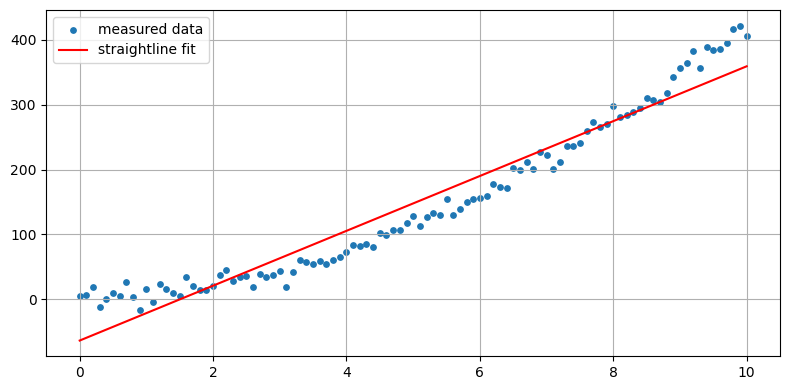

In [15]:
plt.figure(figsize=(8, 4), dpi=100) 
plt.scatter(data[:,0],data[:,1], s = 15, label='measured data')
plt.plot(data[:,0], c_data, color='red', label='straightline fit')
plt.tight_layout()
plt.legend()
plt.grid()

## polynomial fit

In [16]:
mata = np.array([[n, sum_x, sum_xsq],
                [sum_x, sum_xsq, sum_xcub],
                [sum_xsq, sum_xcub, sum_xp4]])

In [17]:
matb = np.array([[sum_y],[sum_xy],[sum_xsqy]])

In [18]:
matb

array([[ 14930.54572779],
       [110895.13697125],
       [885821.42495238]])

In [19]:
def L_U_decomp(c):
    A = np.copy(c)
    n = len(A)
    
    ####-============--UPPER TRIANGULAR-&-LOWER TRIANGULAR=============-####
    L = np.identity(n)  ##-----------identity matrix------------###
    
    for k in range(n-1): #row iteration
        for i in range(k+1,n): #column iteration
            factor = (A[i][k])/(A[k][k])
            
            L[i][k] = factor   
            for j in range(n):  #all column iteration
                A[i][j] = A[i][j] - factor*A[k][j]  #i = row, j = column
    U = A
    return L,U
    ###=====================================================###

In [20]:
L,U = L_U_decomp(mata)

In [21]:
def forwardsubs(a,b):  ##---LD=B------Finding D  matrix
    L = np.copy(a)
    B = np.copy(b)
    n = len(L)
    D = np.zeros((n,1),dtype = float)
    count = 0
    for i in range(n):
        dog = B[i]
        if count >0:
            cat = 0
            for j in range(i):
                cat = cat + L[i][j]*D[j]
                #print(cat)
            dog = B[i] - cat
        D[i] = dog
        count = count + 1
    return D

In [22]:
D = forwardsubs(L,matb)

In [23]:
##--========--- USE OF UX=D TO EVALUATE X-----==========##
def backward_substitution(c,d):
    a,b = np.copy(c), np.copy(d)
    n=len(a)
    x = np.zeros((n,1), dtype = float)
    x[n-1] = (b[n-1])/(a[n-1][n-1])
    for i in range(n-2,-1,-1):
        sum = b[i]
        for j in range(i+1,n):
            sum = sum - a[i][j]*x[j]
        x[i] = sum/a[i][i]
    return x

In [24]:
matc = backward_substitution(U,D)

In [25]:
A_0,A_1,A_2 = matc[0],matc[1],matc[2]

In [27]:
##calculated data
calc_data = []
for i in range(n):
    calc_data.append(A_0 + A_1 * data[i][0] + A_2 * data[i][0]**2)

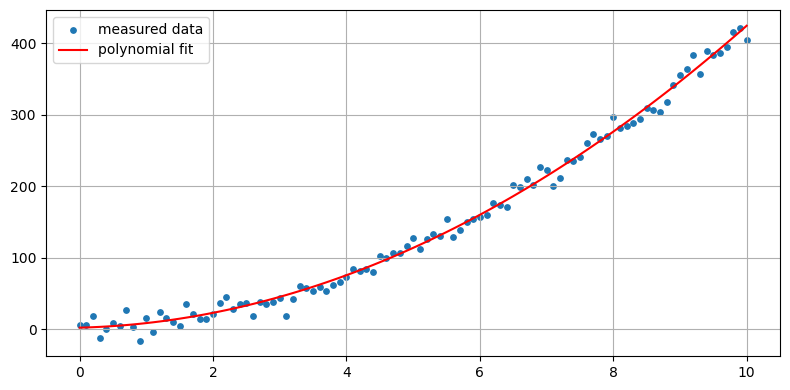

In [28]:
plt.figure(figsize=(8, 4), dpi=100) 
plt.scatter(data[:,0],data[:,1], s = 15, label='measured data')
plt.plot(data[:,0], calc_data, color='red', label='polynomial fit')
plt.tight_layout()
plt.legend()
plt.grid()

In [29]:
##Sr
sr2 = 0
for i in range(n):
    e = (data[i][1] - A_0 - A_1 * data[i][0] - A_2*data[i][1])
    sr2 += e**2 
sr2

array([35928489.38546114])

In [30]:
#Standard error
s_yx2 = np.sqrt(sr2/(n-3))
s_yx2

array([605.48925558])

In [31]:
#correlation coeficient
r2 = (st-sr2)/st
r2

array([-21.00237432])